# Ocean Optics 2017

## BBTeenie CDOM Processing 

In [47]:
# This notebook was built in Catherine's root environment. (Sorry Don!) 
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
%matplotlib inline

In [49]:
%pwd
%cd /Users/ckuhn/Documents/oceanoptics/project/data/BBTeenie

/Users/ckuhn/Documents/oceanoptics/project/data/BBTeenie


In [50]:
data = pd.read_table('BB_Teenie_Rescue.csv', low_memory=False, sep = ',')

In [51]:
data.head(1)

,Unnamed: 0,datetime,date,time,blue_wl,bb_blue_val,red_wl,bb_red_val,cdom_wl,cdom_val,notsure,site_no,reading_type,direction,setting
0,0,7/27/17 18:14,7/27/17,18:14:16,440.0,4130.0,700.0,4130.0,460.0,4130.0,536.0,1.0,crap,NaN,field


### Apply instrument calibration

cdom(qse) = (counts - dark) * slope

In [52]:
cdom_scale_factor = 0.0906
cdom_dark_counts = 48

In [53]:
data['cdom_qse'] = cdom_scale_factor * (data.cdom_val - cdom_dark_counts)

In [54]:
pd.pivot_table(data,index=["site_no", 'setting'], values = ['cdom_val', 'cdom_qse'], aggfunc=[np.median])

median         
                cdom_qse cdom_val
site_no setting                  
1.0     field    25.6398    331.0
        lab      25.6398    331.0
2.0     field    24.5526    319.0
        lab      24.7338    321.0
3.0     field    23.1936    304.0
        lab       0.3624     52.0

### Compute the median

In [24]:
# Filter to light data
data_light = data[data['reading_type'] == 'light']

# Separate field and lab measurements
lab = data_light[data_light['setting'] == 'lab']
field = data_light[data_light['setting'] == 'field']

# Filter each sampling site out
site1_field = field[field['site_no'] == 1]
site2_field = field[field['site_no'] == 2]
site3_field = field[field['site_no'] == 3]

site1_lab = lab[lab['site_no'] == 1]
site2_lab = lab[lab['site_no'] == 2]
site3_lab = lab[lab['site_no'] == 3]

In [29]:
site1_field_cdom = site1_field['cdom_qse']
site2_field_cdom = site2_field['cdom_qse']
site3_field_cdom = site3_field['cdom_qse']

site1_lab_cdom = site1_lab['cdom_qse']
site2_lab_cdom = site2_lab['cdom_qse']
site3_lab_cdom = site3_lab['cdom_qse']

In [32]:
site1_field_med = site1_field_cdom.median()
site2_field_med  = site2_field_cdom.median()
site3_field_med  = site3_field_cdom.median()

site1_lab_med = site1_lab_cdom.median()
site2_lab_med  = site2_lab_cdom.median()
site3_lab_med  = site3_lab_cdom.median()

site1_field_sd = site1_field_cdom.std()
site2_field_sd  = site2_field_cdom.std()
site3_field_sd  = site3_field_cdom.std()

site1_lab_sd = site1_lab_cdom.std()
site2_lab_sd  = site2_lab_cdom.std()
site3_lab_sd  = site3_lab_cdom.std()

### Plot some shit

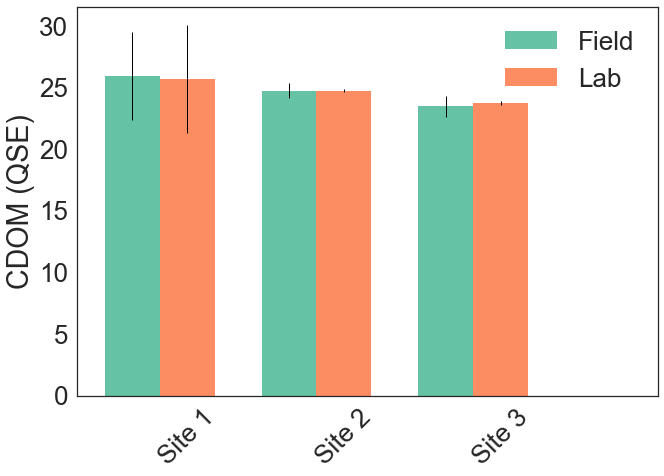

In [43]:
sns.set(style="white")
sns.set_context("talk", font_scale=2)   
plt.figure(figsize=(3.1, 3)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                                                                 

fig = plt.figure()
ax = fig.add_subplot(111)

## the data
N = 3

fieldMeans_700 = [site1_field_med, site2_field_med, site3_field_med]
fieldStd_700  =   [site1_field_sd, site2_field_sd, site3_field_sd]
labMeans_700  = [site1_lab_med, site2_lab_med, site3_lab_med]
labStd_700  =   [site1_lab_sd, site2_lab_sd, site3_lab_sd]

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.35                      # the width of the bars

## the bars
rects1 = ax.bar(ind, fieldMeans_700 , width,
                color='#66c2a5',
                yerr=fieldStd_700 ,
                error_kw=dict(elinewidth=1,ecolor='black'))

rects2 = ax.bar(ind+width, labMeans_700 , width,
                    color='#fc8d62',
                    yerr=labStd_700 ,
                    error_kw=dict(elinewidth=1,ecolor='black'))

# axes and labels
ax.set_xlim(-width,len(ind)+width)
#ax.set_ylim(0,45)
ax.set_ylabel(r'CDOM (QSE)')
#ax.set_title('Scores by site and time of measurement')
xTickMarks = ['Site '+str(i) for i in range(1,6)]
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Field', 'Lab') )
plt.show()